Import yang diperlukan

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Menampilkan Data

In [44]:
df = pd.read_csv('SchoolSocial.csv')
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16.329,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,16.545,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,17.999,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,17.903,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
!pip install feature-engine

Mengelola Data Hilang

In [46]:
print("\nMissing values sebelum cleaning:", df.isna().sum().sum())
df.dropna(inplace=True)
print("Missing values setelah cleaning:", df.isna().sum().sum())
df.isna().sum().sort_values(ascending=False)


Missing values sebelum cleaning: 3833
Missing values setelah cleaning: 0


,0
gradyear,0
gender,0
music,0
rock,0
god,0
church,0
jesus,0
bible,0
hair,0
dress,0


In [47]:
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
5,2008,M,18.034,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,M,18.53,18,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12042 entries, 1 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         12042 non-null  int64 
 1   gender           12042 non-null  object
 2   age              12042 non-null  object
 3   NumberOffriends  12042 non-null  int64 
 4   basketball       12042 non-null  int64 
 5   football         12042 non-null  int64 
 6   soccer           12042 non-null  int64 
 7   softball         12042 non-null  int64 
 8   volleyball       12042 non-null  int64 
 9   swimming         12042 non-null  int64 
 10  cheerleading     12042 non-null  int64 
 11  baseball         12042 non-null  int64 
 12  tennis           12042 non-null  int64 
 13  sports           12042 non-null  int64 
 14  cute             12042 non-null  int64 
 15  sex              12042 non-null  int64 
 16  sexy             12042 non-null  int64 
 17  hot              12042 non-null  int

Karena 'age' tidak sesuai, bersihkan dan perbaiki kolom 'age'

In [50]:
cell_types = df['age'].apply(type)
type_counts = cell_types.value_counts()
print(type_counts)

age
<class 'str'>    12042
Name: count, dtype: int64


In [51]:
contains_letters = df['age'].str.contains('[a-zA-Z]', regex=True)
print(df[contains_letters])

       gradyear gender      age  NumberOffriends  basketball  football  \
428        2007      M  18. Jul               29           1         1   
598        2008      F  17. Jun               57           0         0   
671        2009      F  15. Mai                9           2         0   
701        2009      F  16. Feb               24           1         0   
771        2006      F  18. Apr               34           0         0   
...         ...    ...      ...              ...         ...       ...   
14595      2009      F  16. Jun                5           0         0   
14690      2007      F  17. Jul               83           1         0   
14804      2007      F  17. Mrz               72           0         0   
14869      2006      F  18. Mai               19           0         0   
14977      2008      F  16. Jun               60           1         2   

       soccer  softball  volleyball  swimming  ...  blonde  mall  shopping  \
428         2         0          

In [52]:
df = df.drop(df[contains_letters].index)
print(df)

       gradyear gender     age  NumberOffriends  basketball  football  soccer  \
1          2007      F   17.41               49           0         0       1   
2          2007      F  17.511               41           0         0       0   
4          2008      F  16.657                1           0         0       0   
5          2008      M  18.034               32           0         5       0   
6          2006      M   18.53               18           0         0       0   
...         ...    ...     ...              ...         ...       ...     ...   
14995      2008      F  16.329               21           0         0       0   
14996      2008      F  16.545               50           0         0       0   
14997      2007      F  17.999               32           0         0       0   
14998      2007      F  17.903               20           0         0       0   
14999      2009      F  15.811               25           0         0       7   

       softball  volleyball

In [54]:
df['age'] = pd.to_numeric(df['age'])
df['age'] = df['age'].round().astype(int)
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,2007,F,17,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,18,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,2008,F,17,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
5,2008,M,18,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,M,19,18,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,F,16,21,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,F,17,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,2007,F,18,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,F,18,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11772 entries, 1 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         11772 non-null  int64 
 1   gender           11772 non-null  object
 2   age              11772 non-null  int64 
 3   NumberOffriends  11772 non-null  int64 
 4   basketball       11772 non-null  int64 
 5   football         11772 non-null  int64 
 6   soccer           11772 non-null  int64 
 7   softball         11772 non-null  int64 
 8   volleyball       11772 non-null  int64 
 9   swimming         11772 non-null  int64 
 10  cheerleading     11772 non-null  int64 
 11  baseball         11772 non-null  int64 
 12  tennis           11772 non-null  int64 
 13  sports           11772 non-null  int64 
 14  cute             11772 non-null  int64 
 15  sex              11772 non-null  int64 
 16  sexy             11772 non-null  int64 
 17  hot              11772 non-null  int

Mengelompokkan data categorical

In [57]:
categorical_cols = [var for var in df.columns if df[var].dtype == 'object']
categorical_cols
for col in categorical_cols:
  print(df[col].value_counts())
  print('-'*50)

gender
F    9493
M    2279
Name: count, dtype: int64
--------------------------------------------------


Feature Encoding

In [59]:
from feature_engine.encoding import OrdinalEncoder
label_encoder = OrdinalEncoder(
    encoding_method='arbitrary', # label encoding
    variables=categorical_cols
)

label_encoder.fit(df)

df = label_encoder.transform(df)

In [60]:
numeric_cols = [var for var in df.columns if df[var].dtype != 'object']
numeric_cols

['gradyear',
 'gender',
 'age',
 'NumberOffriends',
 'basketball',
 'football',
 'soccer',
 'softball',
 'volleyball',
 'swimming',
 'cheerleading',
 'baseball',
 'tennis',
 'sports',
 'cute',
 'sex',
 'sexy',
 'hot',
 'kissed',
 'dance',
 'band',
 'marching',
 'music',
 'rock',
 'god',
 'church',
 'jesus',
 'bible',
 'hair',
 'dress',
 'blonde',
 'mall',
 'shopping',
 'clothes',
 'hollister',
 'abercrombie',
 'die',
 'death',
 'drunk',
 'drugs']

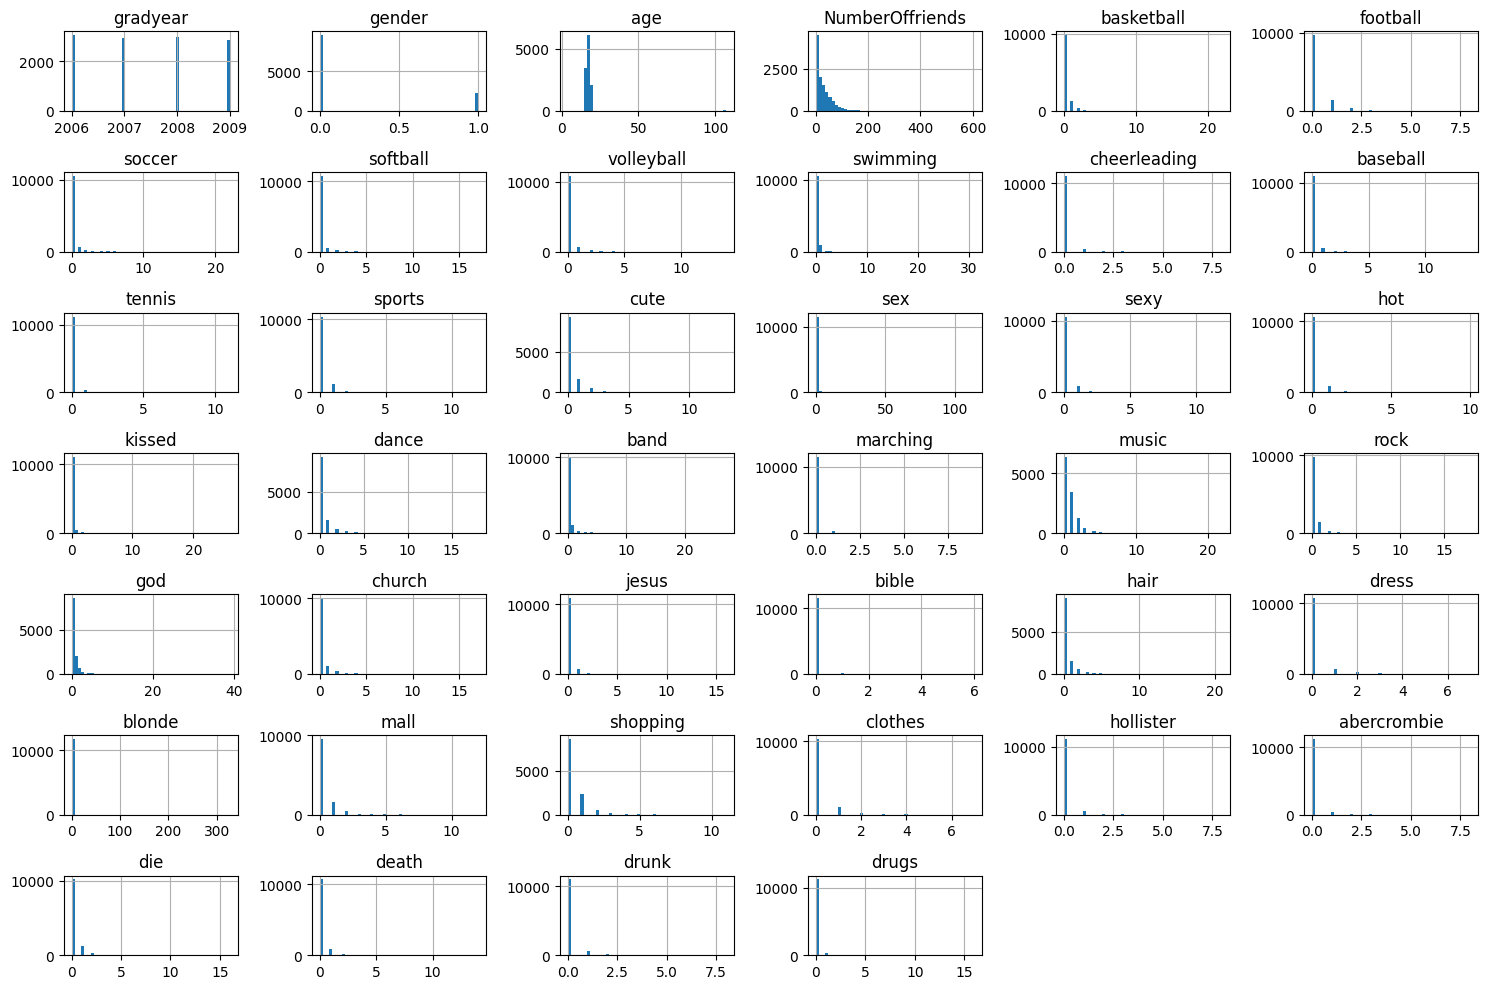

In [61]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

<Axes: ylabel='gradyear'>

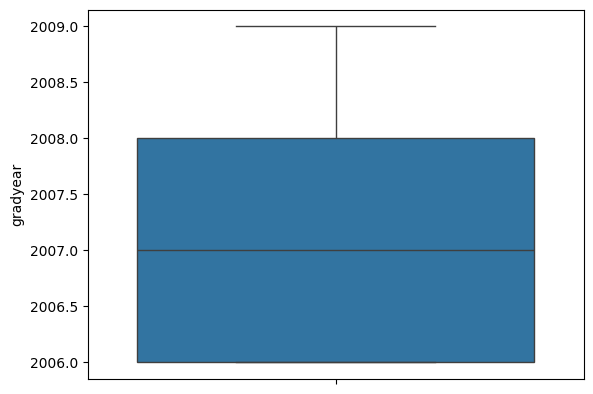

In [62]:
sns.boxplot(df['gradyear'])

array([[<Axes: title={'center': 'gradyear'}>]], dtype=object)

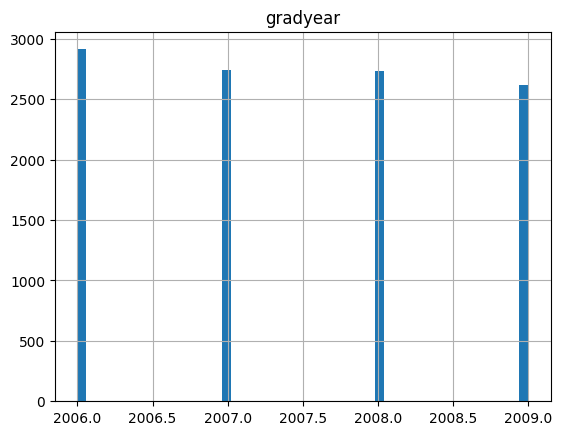

In [71]:
df[['gradyear']].hist(bins=50)

Memperbaiki outlier yang terlalu jauh

<Axes: ylabel='age'>

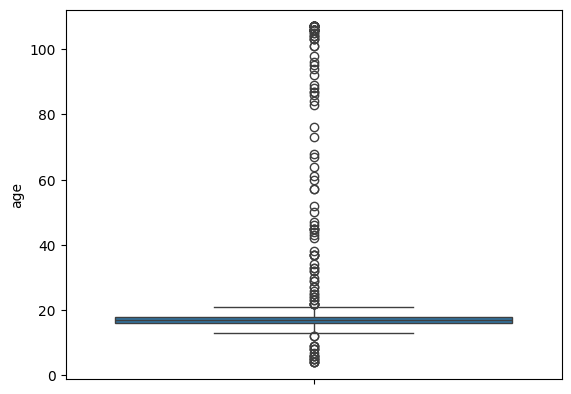

In [63]:
sns.boxplot(df['age'])

<Axes: ylabel='age'>

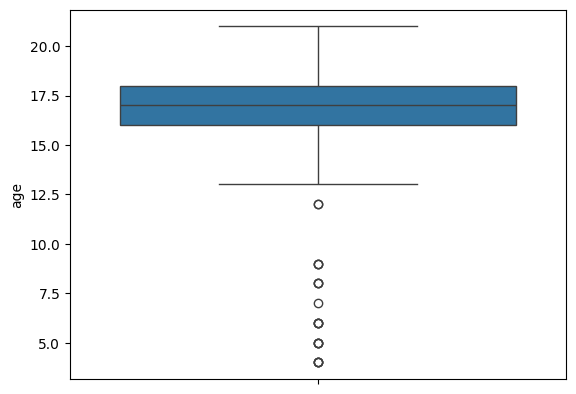

In [64]:
from feature_engine.outliers import OutlierTrimmer

remove_outlier = OutlierTrimmer(
    capping_method='iqr',
    tail='right',
    variables=['age']
)

df = remove_outlier.fit_transform(df)

sns.boxplot(df['age'])

<Axes: ylabel='NumberOffriends'>

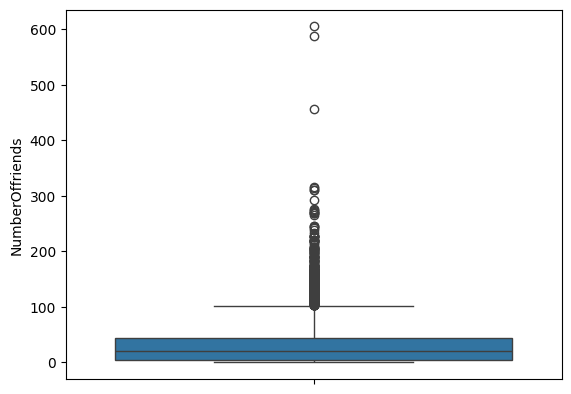

In [65]:
sns.boxplot(df['NumberOffriends'])

array([[<Axes: title={'center': 'NumberOffriends'}>]], dtype=object)

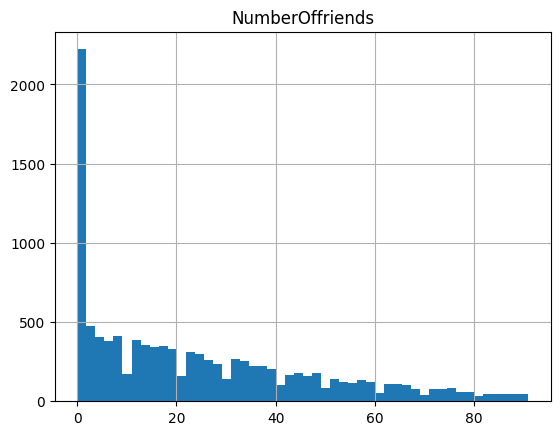

In [70]:
remove_outlier = OutlierTrimmer(
    capping_method='iqr',
    tail='right',
    variables=['NumberOffriends']
)

df = remove_outlier.fit_transform(df)

df[['NumberOffriends']].hist(bins=50)

Feature Scaling

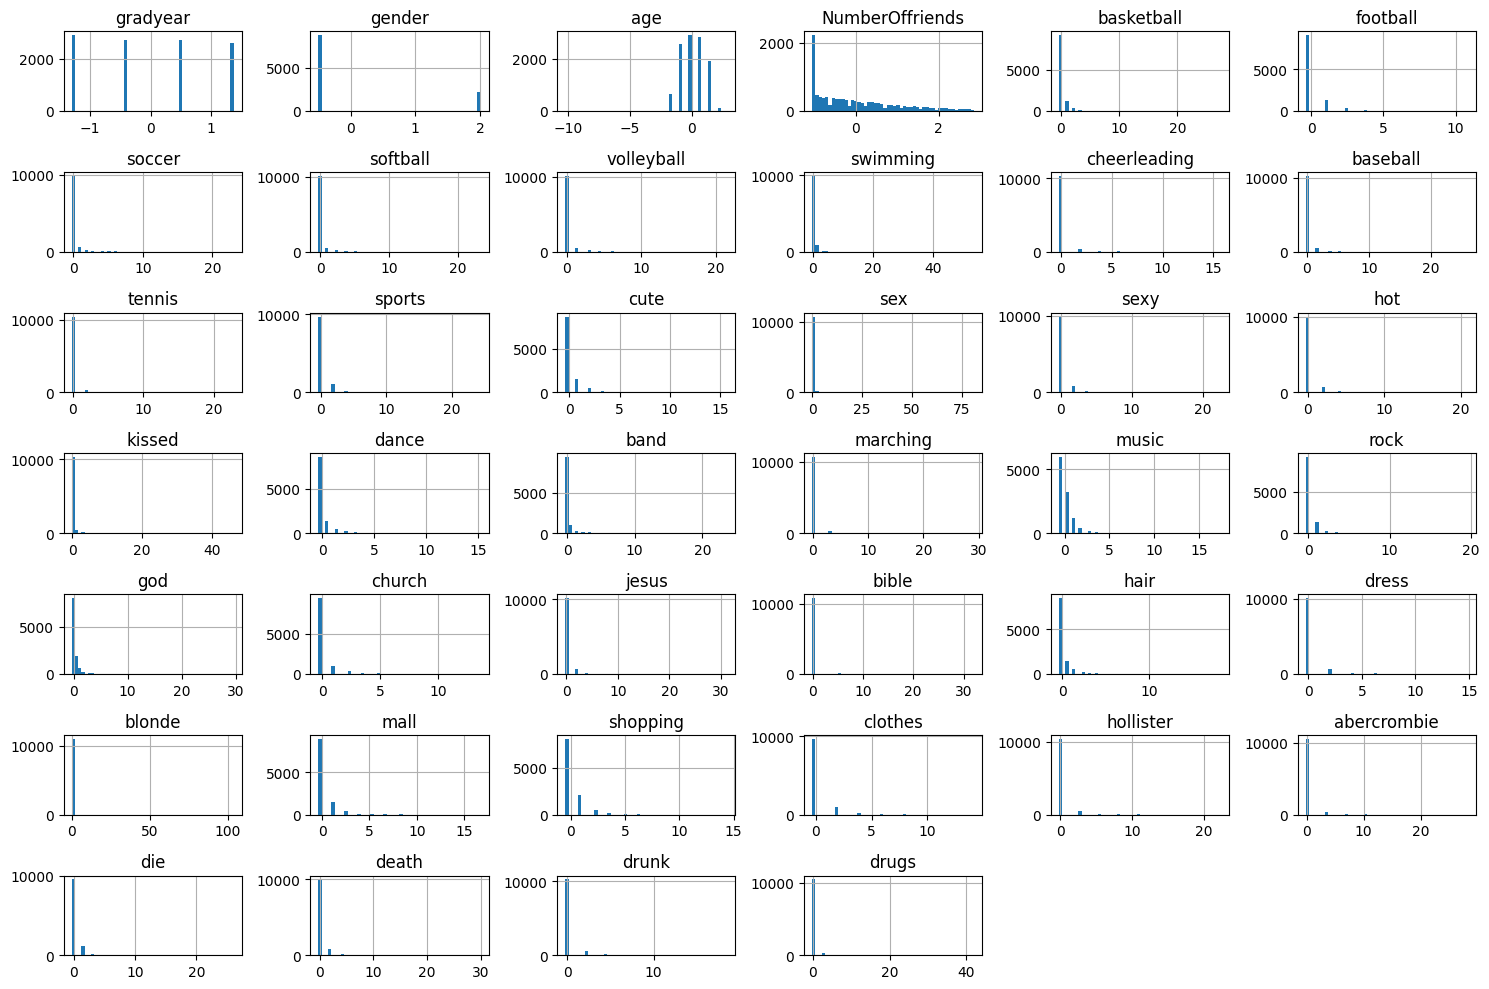

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

Dimesionality Reduction (PCA Method)

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2', 'PC3'])

df_pca.head()

,PC1,PC2,PC3
0,-0.715745,-0.109502,-0.278660
1,2.444905,-1.724031,0.267569
2,4.561060,0.483496,-1.841030
3,-0.314605,-0.520205,2.234414
4,-1.152092,-1.717300,-0.558484


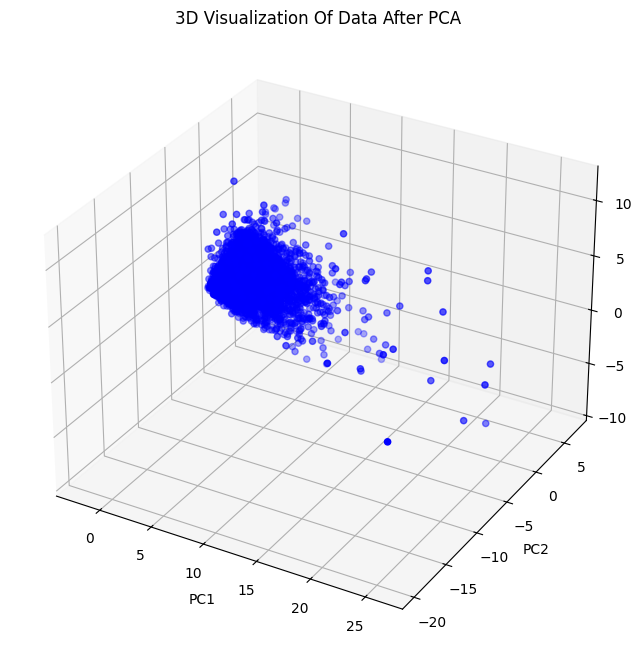

In [75]:
x, y, z = df_pca['PC1'], df_pca['PC2'], df_pca['PC3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Visualization Of Data After PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

K-Means Clustering

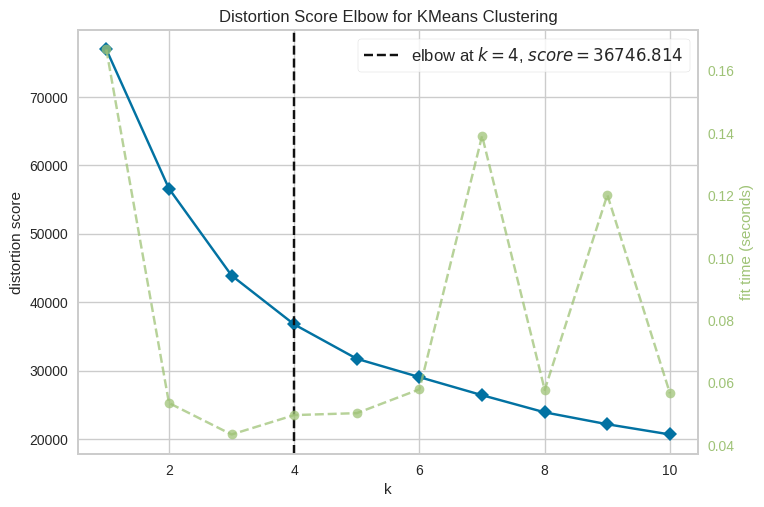

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(df_pca)
visualizer.show()

In [78]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(df_pca)
y_kmeans
df['Cluster Kmeans'] = y_kmeans
df

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Cluster Kmeans
1,-0.410369,-0.497812,-0.202016,1.051531,-0.342591,-0.373271,0.818364,-0.220791,-0.221029,1.495270,...,-0.377117,-0.492572,-0.320264,-0.194659,-0.179493,-0.306654,-0.258341,2.123685,-0.176565,1
2,-0.410369,-0.497812,0.570519,0.708081,-0.342591,-0.373271,-0.241262,-0.220791,-0.221029,-0.239332,...,1.046225,-0.492572,-0.320264,-0.194659,-0.179493,-0.306654,-0.258341,2.123685,2.459214,3
4,0.482959,-0.497812,-0.202016,-1.009170,-0.342591,-0.373271,-0.241262,-0.220791,-0.221029,1.495270,...,-0.377117,-0.492572,5.894106,-0.194659,-0.179493,-0.306654,-0.258341,-0.221000,-0.176565,0
5,0.482959,2.008791,0.570519,0.321700,-0.342591,6.632411,-0.241262,-0.220791,-0.221029,-0.239332,...,-0.377117,-0.492572,-0.320264,-0.194659,-0.179493,-0.306654,-0.258341,-0.221000,-0.176565,3
6,-1.303698,2.008791,1.343054,-0.279338,-0.342591,-0.373271,-0.241262,-0.220791,-0.221029,-0.239332,...,-0.377117,-0.492572,1.751192,-0.194659,-0.179493,-0.306654,-0.258341,-0.221000,-0.176565,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.482959,-0.497812,-0.974551,-0.150544,-0.342591,-0.373271,-0.241262,-0.220791,-0.221029,-0.239332,...,-0.377117,-0.492572,3.822649,-0.194659,-0.179493,-0.306654,1.901440,-0.221000,-0.176565,2
14996,0.482959,-0.497812,-0.202016,1.094462,-0.342591,-0.373271,-0.241262,-0.220791,-0.221029,-0.239332,...,-0.377117,-0.492572,-0.320264,-0.194659,-0.179493,-0.306654,1.901440,-0.221000,-0.176565,2
14997,-0.410369,-0.497812,0.570519,0.321700,-0.342591,-0.373271,-0.241262,-0.220791,-0.221029,-0.239332,...,-0.377117,-0.492572,-0.320264,-0.194659,-0.179493,-0.306654,-0.258341,-0.221000,-0.176565,1
14998,-0.410369,-0.497812,0.570519,-0.193476,-0.342591,-0.373271,-0.241262,-0.220791,-0.221029,-0.239332,...,-0.377117,-0.492572,-0.320264,-0.194659,-0.179493,-0.306654,-0.258341,-0.221000,-0.176565,1


<ipython-input-79-cedcabdc46c4>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Cluster Kmeans', palette=palette_kmeans, bins=50)


<Axes: xlabel='Cluster Kmeans', ylabel='Count'>

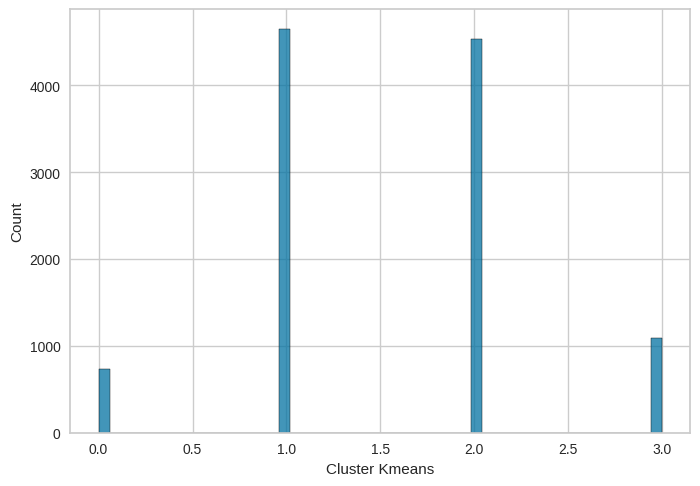

In [79]:
palette_kmeans = ['#679436', '#eb5e28', '#4361ee', '#fb8500']
sns.histplot(data=df, x='Cluster Kmeans', palette=palette_kmeans, bins=50)

<ipython-input-82-002f1e51f96b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster Kmeans', y='age', palette=palette_kmeans)


<Axes: xlabel='Cluster Kmeans', ylabel='age'>

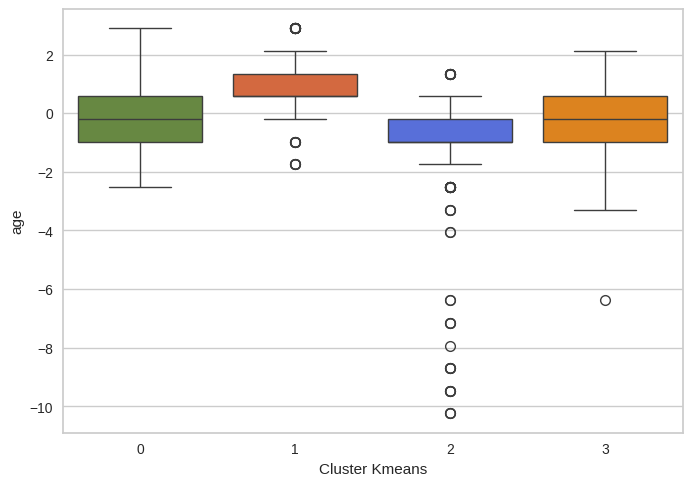

In [82]:
sns.boxplot(data=df, x='Cluster Kmeans', y='age', palette=palette_kmeans)

<ipython-input-83-4405e94001be>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster Kmeans', y='gradyear', palette=palette_kmeans)


<Axes: xlabel='Cluster Kmeans', ylabel='gradyear'>

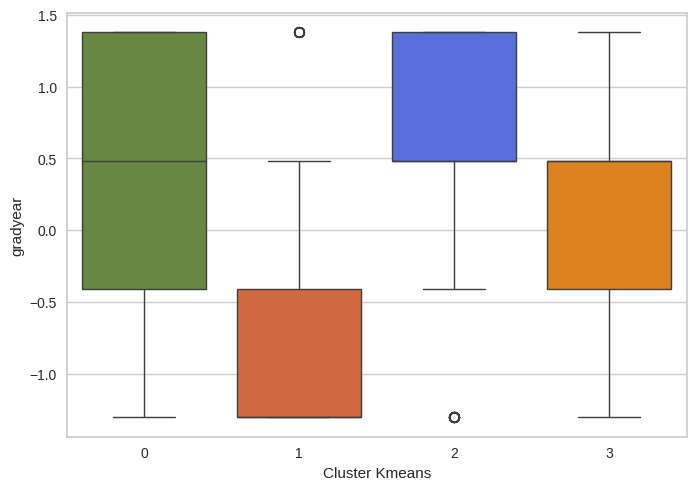

In [83]:
sns.boxplot(data=df, x='Cluster Kmeans', y='gradyear', palette=palette_kmeans)

<Axes: xlabel='gradyear', ylabel='NumberOffriends'>

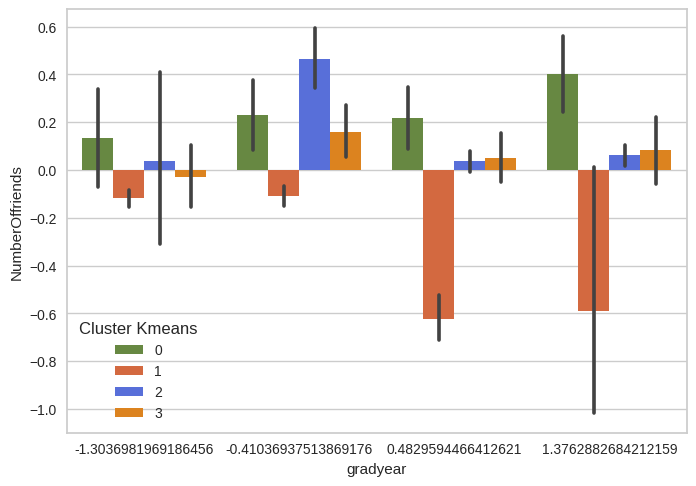

In [88]:
sns.barplot(x='gradyear', y='NumberOffriends', data=df, hue='Cluster Kmeans', palette=palette_kmeans)

## A. Insight Umum

1. **Variasi gradyear per cluster**
    
    - Dari boxplot, terlihat bahwa setiap cluster memiliki rentang “gradyear” yang berbeda. Ada cluster dengan median gradyear yang lebih tinggi, ada yang lebih rendah, menandakan bahwa pembagian cluster cukup memisahkan mahasiswa/siswa berdasarkan waktu kelulusan atau usia akademik.
2. **Perbedaan pola “NumberOfFriends”**
    
    - Pada barplot, nilai “NumberOfFriends” bervariasi di setiap rentang gradyear. Beberapa cluster menunjukkan nilai positif (lebih banyak teman) pada gradyear tertentu, sementara cluster lain cenderung negatif (lebih sedikit teman) di gradyear tersebut.
3. **Indikasi bahwa K-Means menangkap dimensi ‘waktu/usia akademik’ dan ‘jejaring sosial’**
    
    - Kombinasi antara gradyear dan jumlah teman (NumberOfFriends) tampaknya menjadi faktor penting yang membedakan cluster. Hal ini menunjukkan bahwa ada pola sosial yang berbeda untuk kelompok siswa dengan tahun kelulusan yang berbeda.

---

## B. Insight & Konklusi

1. **Hubungan gradyear dengan aktivitas sosial**
    
    - Secara umum, semakin mendekati waktu kelulusan (gradyear yang lebih tinggi), bisa jadi beberapa kelompok mahasiswa/siswa (cluster tertentu) memiliki pola pertemanan yang berbeda dibandingkan mereka yang masih jauh dari kelulusan (gradyear rendah). Misalnya, bisa jadi cluster dengan gradyear tinggi lebih aktif di media sosial sehingga jumlah teman lebih tinggi (atau sebaliknya).
2. **Potensi pengelompokan berdasar ‘tingkat keterlibatan’**
    
    - Cluster yang memiliki “NumberOfFriends” tinggi pada rentang gradyear tertentu mungkin menggambarkan siswa yang sangat aktif dan memiliki banyak koneksi sosial. Sebaliknya, cluster dengan “NumberOfFriends” rendah bisa saja merefleksikan kelompok yang lebih sedikit terlibat di media sosial atau lingkar pertemanan.
3. **Pemanfaatan untuk intervensi atau strategi**
    
    - Jika dataset ini digunakan untuk keperluan akademik atau pengembangan platform sosial kampus, maka setiap cluster bisa ditargetkan dengan pendekatan yang berbeda. Contohnya, mahasiswa dengan gradyear rendah tapi jumlah teman sedikit (jika ada cluster seperti ini) dapat dibantu dengan program orientasi atau community-building.

**Kesimpulan:**  
Hasil clustering menunjukkan adanya segmentasi mahasiswa/siswa yang cukup jelas berdasarkan tahun kelulusan dan jumlah pertemanan. Hal ini membuka peluang untuk intervensi yang lebih terarah (misalnya promosi kegiatan kampus, penawaran program tertentu, dsb.) serta memberikan pemahaman mengenai perilaku sosial di lingkungan akademik.

---

## 3. Analisis per Cluster

### **Cluster 0**

- **Gradyear**: Memiliki median gradyear yang berada di sekitar nilai sedang (tidak terlalu tinggi, tidak terlalu rendah), tetapi range cukup lebar.
- **NumberOfFriends**: Dari barplot, di beberapa rentang gradyear, cluster 0 menunjukkan kecenderungan positif atau netral. Ini mengindikasikan bahwa anggota cluster 0 bisa jadi punya jejaring sosial yang cukup stabil di berbagai tahun kelulusan.

**Interpretasi:**  
Kelompok ini bisa saja merupakan siswa/mahasiswa dengan keterlibatan sosial menengah ke atas di berbagai jenjang tahun. Mereka tidak ekstrem (tidak paling tinggi atau paling rendah) dalam hal gradyear maupun jumlah teman.

---

### **Cluster 1**

- **Gradyear**: Cenderung memiliki median yang lebih rendah (di boxplot terlihat negatif), menandakan mereka mungkin berada di tahun kelulusan lebih awal atau generasi yang lebih lama (jika data di-standarisasi, berarti di bawah rata-rata).
- **NumberOfFriends**: Pada barplot, tampak beberapa rentang gradyear di mana cluster 1 justru negatif atau lebih rendah dibanding cluster lain.

**Interpretasi:**  
Kelompok ini bisa merefleksikan siswa yang lebih senior (atau punya gradyear lebih awal) dan cenderung kurang aktif atau kurang memiliki koneksi sosial (jumlah teman lebih sedikit). Bisa menjadi target khusus untuk penjangkauan alumni atau re-engagement.

---

### **Cluster 2**

- **Gradyear**: Memiliki median paling tinggi. Ini mengindikasikan mereka mungkin yang paling “baru” akan lulus atau masih jauh dari kelulusan (tergantung konteks data; jika scale-nya makin tinggi berarti lebih baru, atau sebaliknya).
- **NumberOfFriends**: Pada barplot, di beberapa gradyear, cluster 2 menunjukkan nilai cukup tinggi (positif) dibanding cluster lain.

**Interpretasi:**  
Cluster ini bisa jadi adalah kelompok paling aktif di media sosial atau memiliki pertemanan luas, terutama jika mereka adalah mahasiswa baru atau sedang di puncak aktivitas akademik/sosial.

---

### **Cluster 3**

- **Gradyear**: Boxplot menunjukkan median di area negatif hingga mendekati netral. Range-nya juga cukup lebar.
- **NumberOfFriends**: Di barplot, terlihat beberapa rentang gradyear di mana cluster 3 cukup bervariasi; ada yang positif dan ada yang negatif.

**Interpretasi:**  
Mungkin cluster yang cukup heterogen: beberapa anggota punya cukup banyak teman, sementara yang lain tidak. Dari sisi gradyear, mereka mungkin berada di pertengahan atau mendekati akhir studi. Karena keragaman internal, perlu analisis lebih lanjut untuk melihat apa yang membuat cluster ini terpisah dari yang lain.